In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

%config InlineBackend.figure_format = 'retina'

In [49]:
df_d = pd.read_csv('data_final.csv', encoding='utf-8')
# 자동차 등록대수 열 = 자동차 등록대수 열 / 인구수 열
# df_d['자동차 등록대수'] = df_d['자동차 등록대수'] / df_d['인구수']
# 행정동명 열 삭제
# df_d = df_d.drop(['행정동명'], axis=1)
# 행정구 행정동 열을 합쳐 row name으로 사용하고 두 열 삭제
df_d = df_d.set_index(['행정구', '행정동'])
df_d = df_d.drop(['Column1'], axis=1)
df_d

인구수    age_10    age_20  age_3040       노약자   사업체수    종사자수  \
행정구  행정동                                                                  
송파구  가락1동  27670  0.096314  0.095699  0.354355  0.142212   3791   12367   
     가락2동  31450  0.103529  0.130175  0.310715  0.149571   3155   11544   
     가락본동  25617  0.063552  0.140571  0.318070  0.164930   5069   28151   
구로구  가리봉동  12478  0.025325  0.146818  0.285062  0.178875   1189    4248   
금천구  가산동   27166  0.025068  0.268571  0.376058  0.110248  25043  182376   
...          ...       ...       ...       ...       ...    ...     ...   
용산구  효창동   10828  0.062615  0.152290  0.337828  0.147950    702    2596   
     후암동   16540  0.068622  0.137485  0.320798  0.185248   1367    4605   
동대문구 휘경1동  16168  0.055418  0.348714  0.244805  0.135267   1285    3690   
     휘경2동  25288  0.077349  0.261152  0.251028  0.167550   1665    5457   
동작구  흑석동   32366  0.074337  0.195298  0.279398  0.160353   2136   11037   

             집개수       소득  버스정류장개수  지하철역개수  도로평균속도  1인당자동차등록대수  시내버스노선수  \
행정구  행정동                                                                  
송파구  가락1동   9716  4973588       14       3   16.42    0.412215      131   
     가락2동  10424  3910198       21       2   15.61    0.342067       60   
     가락본동   8410  3521561       25       1   16.24    0.491314      105   
구로구  가리봉동   2551  2336331        9       0   15.08    0.218785       63   
금천구  가산동    6200  2567594      105       3   18.46    0.736582      199   
...          ...      ...      ...     ...     ...         ...      ...   
용산구  효창동    3463  3523201       15       0   16.11    0.299778       36   
     후암동    5363  3013677       16       0   18.46    0.242684       23   
동대문구 휘경1동   4327  2722774       13       1   22.15    0.243196       83   
     휘경2동   6802  3071586       18       0   15.97    0.251226      147   
동작구  흑석동    9613  4224946       48       1   15.36    0.281067      104   

              버스승차량  
행정구  행정동             
송파구  가락1동   2536468  
     가락2동   2364616  
     가락본동   3266207  
구로구  가리봉동   2449595  
금천구  가산동   11305765  
...             ...  
용산구  효창동    1690652  
     후암동    2036706  
동대문구 휘경1동   4863450  
     휘경2동   3425222  
동작구  흑석동    6095541  

[425 rows x 15 columns]

In [51]:
df_popul_company = df_d.drop(['종사자수', '집개수'], axis=1)
df_popul_company

인구수    age_10    age_20  age_3040       노약자   사업체수       소득  \
행정구  행정동                                                                   
송파구  가락1동  27670  0.096314  0.095699  0.354355  0.142212   3791  4973588   
     가락2동  31450  0.103529  0.130175  0.310715  0.149571   3155  3910198   
     가락본동  25617  0.063552  0.140571  0.318070  0.164930   5069  3521561   
구로구  가리봉동  12478  0.025325  0.146818  0.285062  0.178875   1189  2336331   
금천구  가산동   27166  0.025068  0.268571  0.376058  0.110248  25043  2567594   
...          ...       ...       ...       ...       ...    ...      ...   
용산구  효창동   10828  0.062615  0.152290  0.337828  0.147950    702  3523201   
     후암동   16540  0.068622  0.137485  0.320798  0.185248   1367  3013677   
동대문구 휘경1동  16168  0.055418  0.348714  0.244805  0.135267   1285  2722774   
     휘경2동  25288  0.077349  0.261152  0.251028  0.167550   1665  3071586   
동작구  흑석동   32366  0.074337  0.195298  0.279398  0.160353   2136  4224946   

           버스정류장개수  지하철역개수  도로평균속도  1인당자동차등록대수  시내버스노선수     버스승차량  
행정구  행정동                                                           
송파구  가락1동       14       3   16.42    0.412215      131   2536468  
     가락2동       21       2   15.61    0.342067       60   2364616  
     가락본동       25       1   16.24    0.491314      105   3266207  
구로구  가리봉동        9       0   15.08    0.218785       63   2449595  
금천구  가산동       105       3   18.46    0.736582      199  11305765  
...            ...     ...     ...         ...      ...       ...  
용산구  효창동        15       0   16.11    0.299778       36   1690652  
     후암동        16       0   18.46    0.242684       23   2036706  
동대문구 휘경1동       13       1   22.15    0.243196       83   4863450  
     휘경2동       18       0   15.97    0.251226      147   3425222  
동작구  흑석동        48       1   15.36    0.281067      104   6095541  

[425 rows x 13 columns]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt

def lasso_ridge_graph(df, target_column):
    X = df.drop([target_column], axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)
    X_train_final = X_train
    X_test_final = X_train
    X_train, y_train = X_train.values, y_train.values
    X_test, y_test = X_test.values, y_test.values

    # 모델 학습
    model_LR = LinearRegression(n_jobs = -1)
    model_LR.fit(X_train, y_train)

    # 계수 출력
    display(pd.DataFrame(model_LR.coef_,
        index = X_test_final.columns, columns = ['Linear regression 계수']))

    model_Lasso1 = Lasso(alpha = 0.0001, random_state = 1)
    model_Lasso2 = Lasso(alpha = 100.0, random_state = 1)
    model_Ridge1 = Ridge(alpha = 0.0001, random_state = 1)
    model_Ridge2 = Ridge(alpha = 100.0, random_state = 1)

    model_Lasso1.fit(X_train, y_train)
    model_Lasso2.fit(X_train, y_train)
    model_Ridge1.fit(X_train, y_train)
    model_Ridge2.fit(X_train, y_train)

    plt.figure(figsize = (10, 5))
    plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label = 'LR', c = 'gray')
    plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label = 'Lasso alpha = 0.0001')
    plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label = 'Lasso alpha = 100')
    plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label = 'Ridge alpha = 0.0001')
    plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label = 'Ridge alpha = 100')
    plt.legend()
    plt.ylim((-0.1, 1000))
    plt.show()

In [32]:
from sklearn.linear_model import LassoCV

def find_alpha(df, target_column, alphas):
    X = df.drop([target_column], axis=1)
    y = df[target_column]
    X_train, y_train = X.values, y.values

    # LassoCV 모델 생성
    lasso_cv = LassoCV(alphas=alphas, cv=5)  # cv는 교차 검증의 폴드(fold) 수를 나타냄

    # 모델 훈련
    lasso_cv.fit(X_train, y_train)

    # 최적의 alpha 값 출력
    print("Optimal alpha:", lasso_cv.alpha_)

    return lasso_cv

In [26]:
import matplotlib.pyplot as plt

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)), columns=['Features', 'Coefficients'])
    coef_df = coef_df.sort_values(by='Coefficients')
    
    plt.figure(figsize=(8, 10))
    plt.barh(coef_df['Features'], coef_df['Coefficients'])
    plt.xlabel('Coefficients')
    plt.ylabel('Features')
    plt.title('Feature Coefficients')
    plt.show()

In [33]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

def train_lasso(df, target_column, alpha):
    X = df.drop([target_column], axis=1)
    y = df[target_column]
    X_train, y_train = X.values, y.values

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_train)

    plot_coef(X.columns, lasso.coef_)
    print(lasso.coef_)

    return lasso, lasso_pred

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(df):
    num_cols = df.select_dtypes(include=[np.number]).columns
    corr = df[num_cols].corr()
    mask = np.triu(np.ones_like(corr))

    plt.figure(figsize = [15,10])
    sns.heatmap(corr, annot = True, mask = mask, cmap = 'Blues_r', fmt = '.1g')
    plt.show()

In [35]:
import statsmodels.api as sm

def calculate_aic(df, target_column):
    X = df.drop([target_column], axis=1)
    y = df[target_column]
    X = sm.add_constant(X)  # Add a constant term like so the model would be y = Xb + c

    model = sm.OLS(y, X)
    results = model.fit()

    return results.aic

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df, target_column):
    X = df.drop([target_column], axis=1)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif_data

,Linear regression 계수
인구수,-6.743576e+00
age_10,-7.662213e+06
age_20,5.274404e+06
age_3040,-8.397334e+06
노약자,-3.661294e+06
사업체수,2.066884e+02
소득,1.722911e-01
버스정류장개수,2.176869e+04
지하철역개수,3.571690e+04
도로평균속도,-6.633677e+04


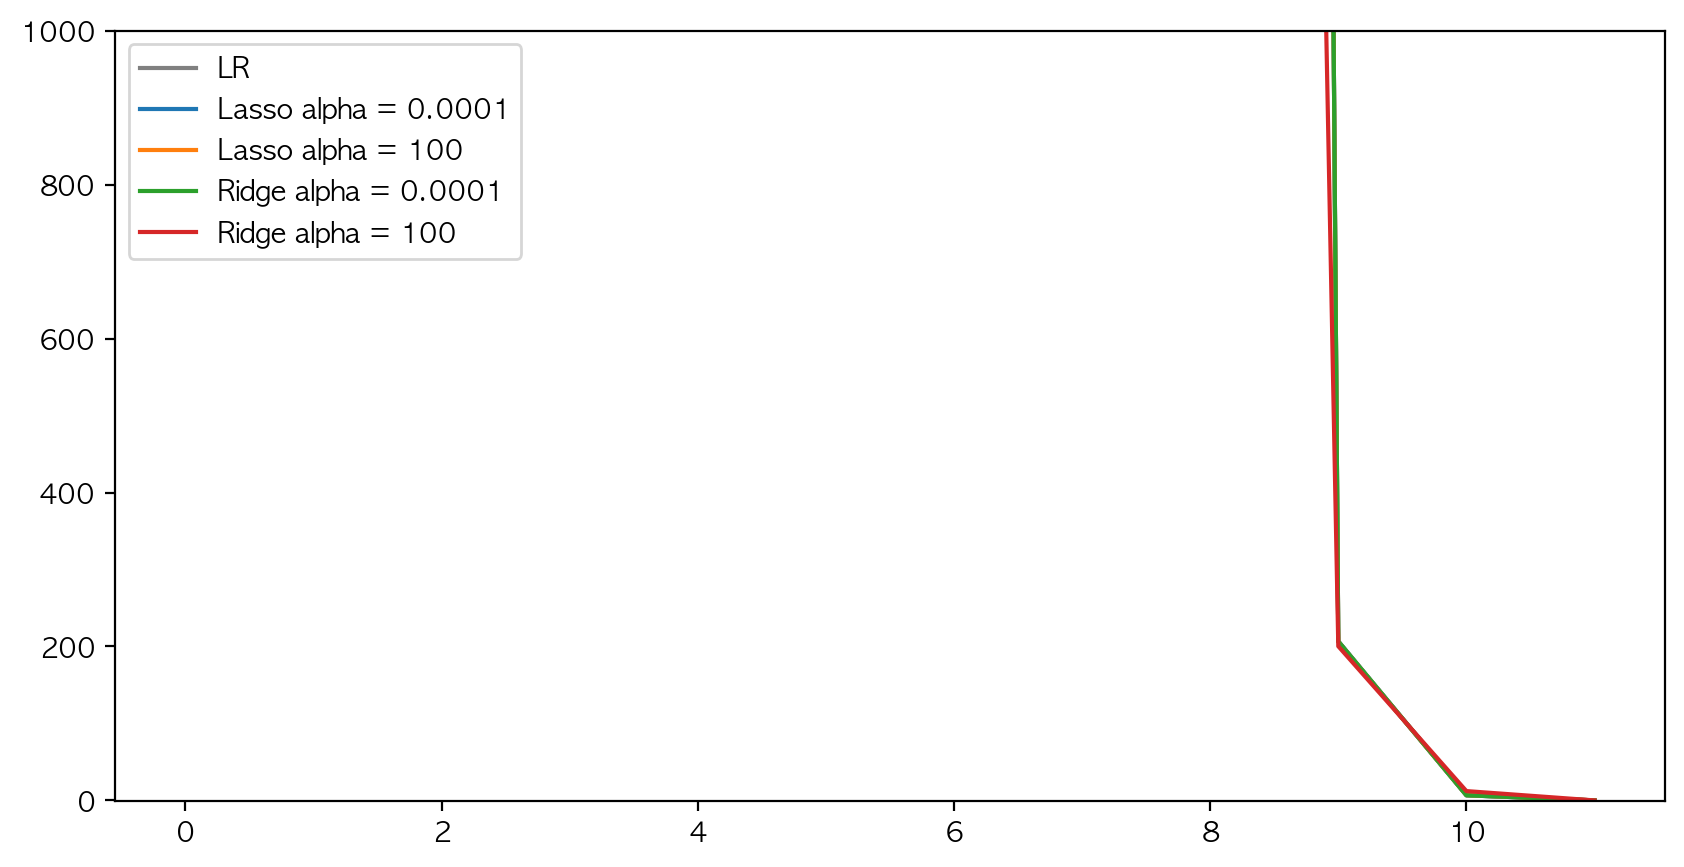

In [52]:
lasso_ridge_graph(df_popul_company, '버스승차량')

In [53]:
find_alpha(df_popul_company, '버스승차량', alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])

Optimal alpha: 100.0


LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=5)

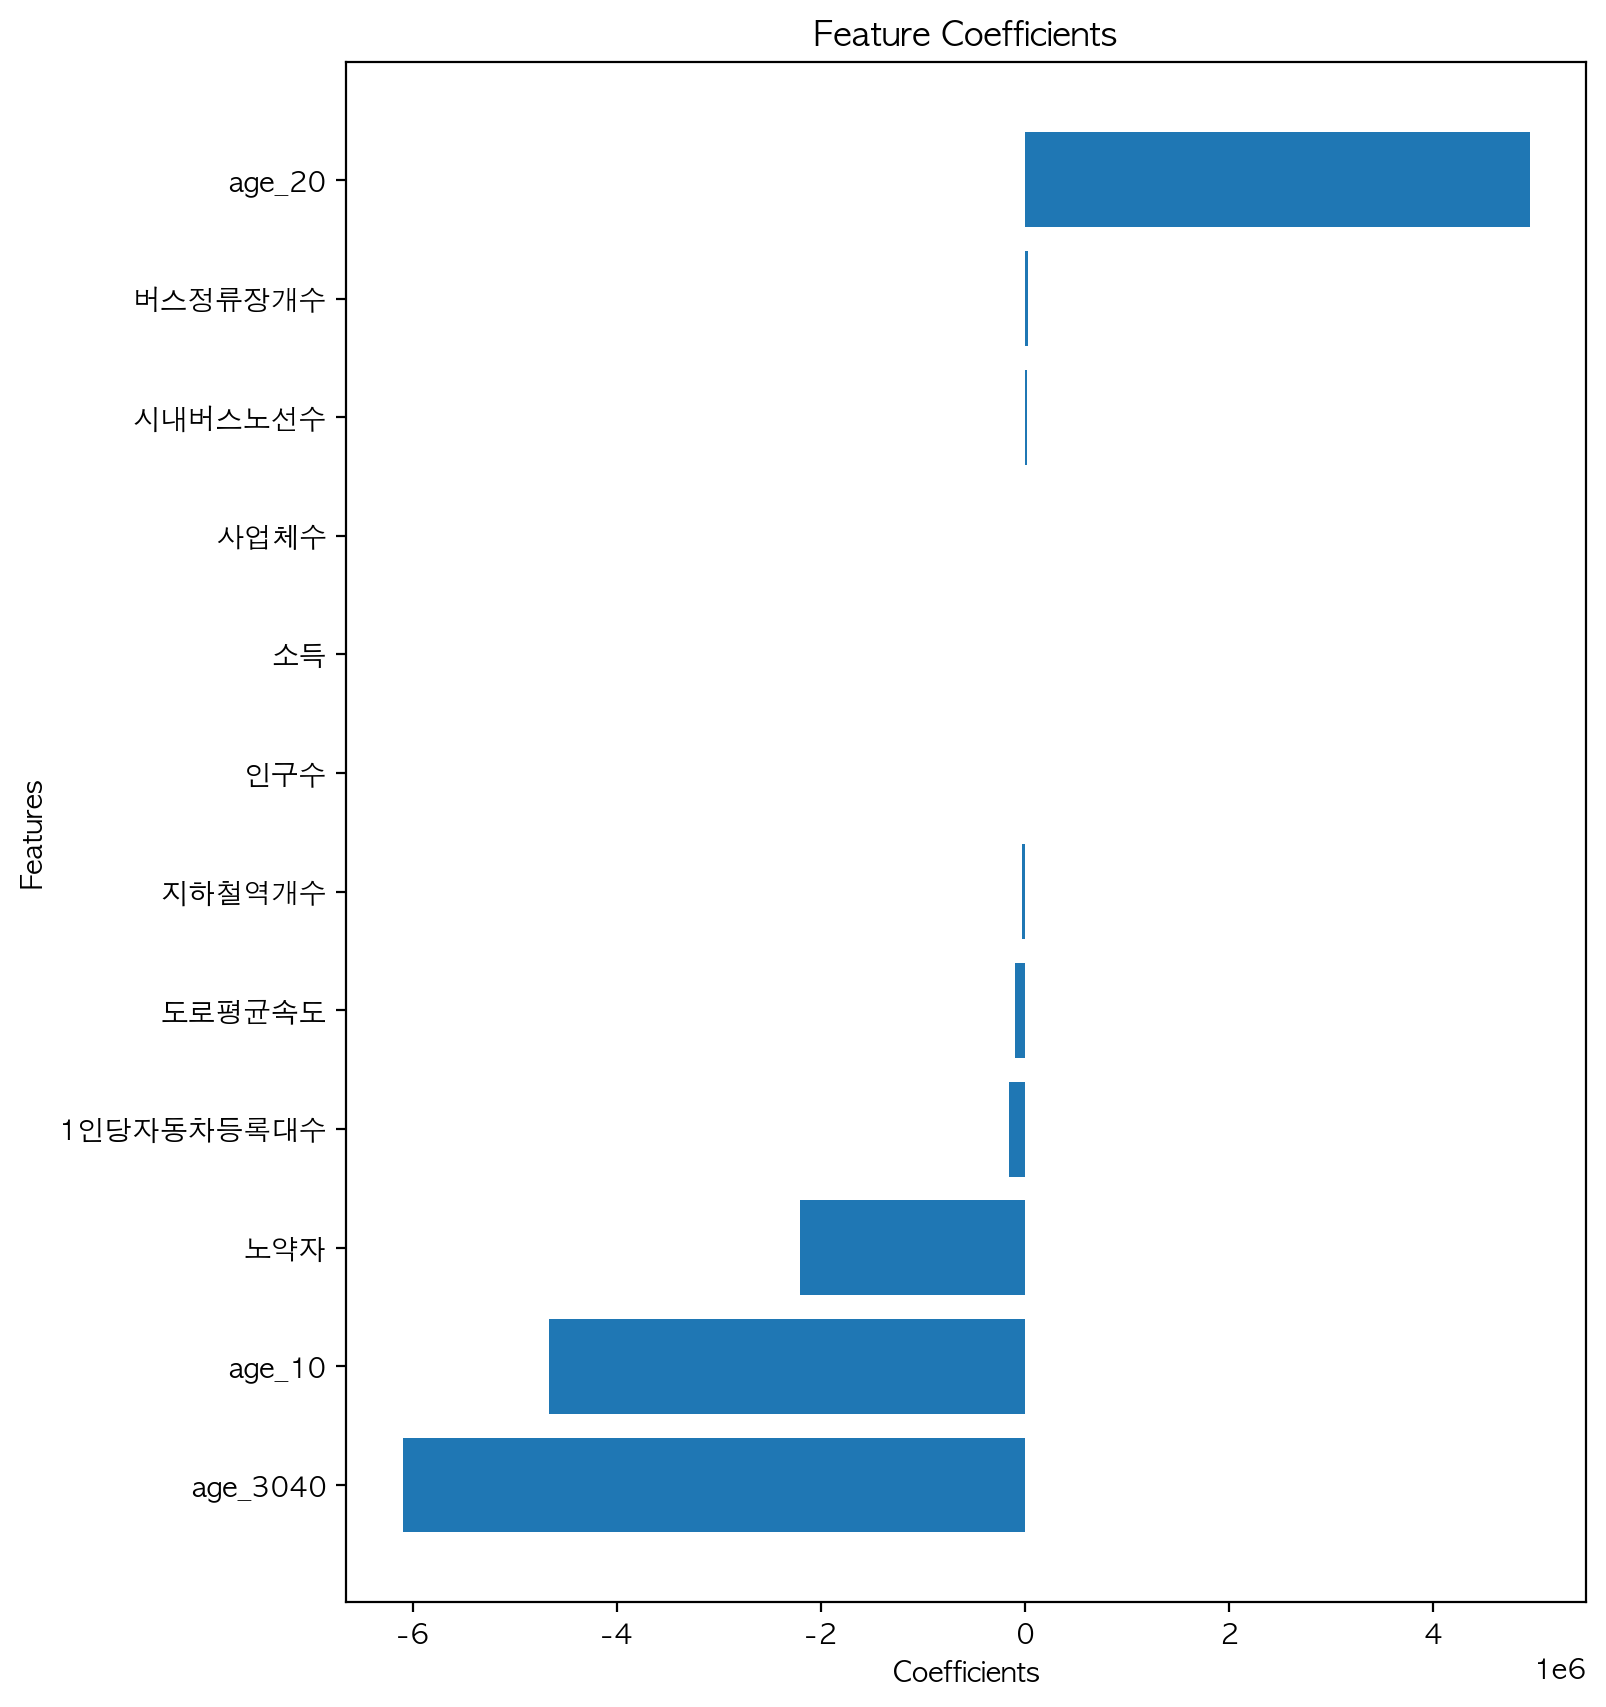

[-4.71547574e+00 -4.66870426e+06  4.94930465e+06 -6.10149982e+06
 -2.20556114e+06  2.53756710e+02  1.40561651e-01  2.77579084e+04
 -2.53400924e+04 -9.76463258e+04 -1.56055765e+05  2.03033386e+04]


(Lasso(alpha=100),
 array([ 4028589.63742138,  2955030.70754847,  4538160.85398189,
         2713251.66703325, 13868685.97233553,  8273473.30696969,
         1191245.6623984 ,  1687030.74959997,   991715.19643844,
         3079497.98062685,  3378902.19970723,  5109442.76835604,
         3968010.61688107,  2854768.49478189,  1900055.8033436 ,
         2357803.61752992,  3626514.99708029,   812191.97063364,
         3107761.79781117,  1479014.77317611,  1434682.29590601,
         1250898.26099581,  1714938.91771846,  3363584.43671537,
         2516757.19205371,  4382576.81900526,  6000187.13793436,
         6555846.56042691,  6727667.03590542,  4488582.78413245,
         6315788.5695156 ,  1703538.49361235,  1149454.9771364 ,
         7586567.58668999,  5678310.9433056 ,  2334500.98237379,
         4551510.65717048,  3365228.56811112,  2273800.44869703,
         2483374.17849278,  3735463.8189125 ,  4039974.39601393,
         2047053.9783555 ,  2214995.21299626,  1783569.46886533,
      

In [54]:
train_lasso(df_popul_company, '버스승차량', alpha=100)

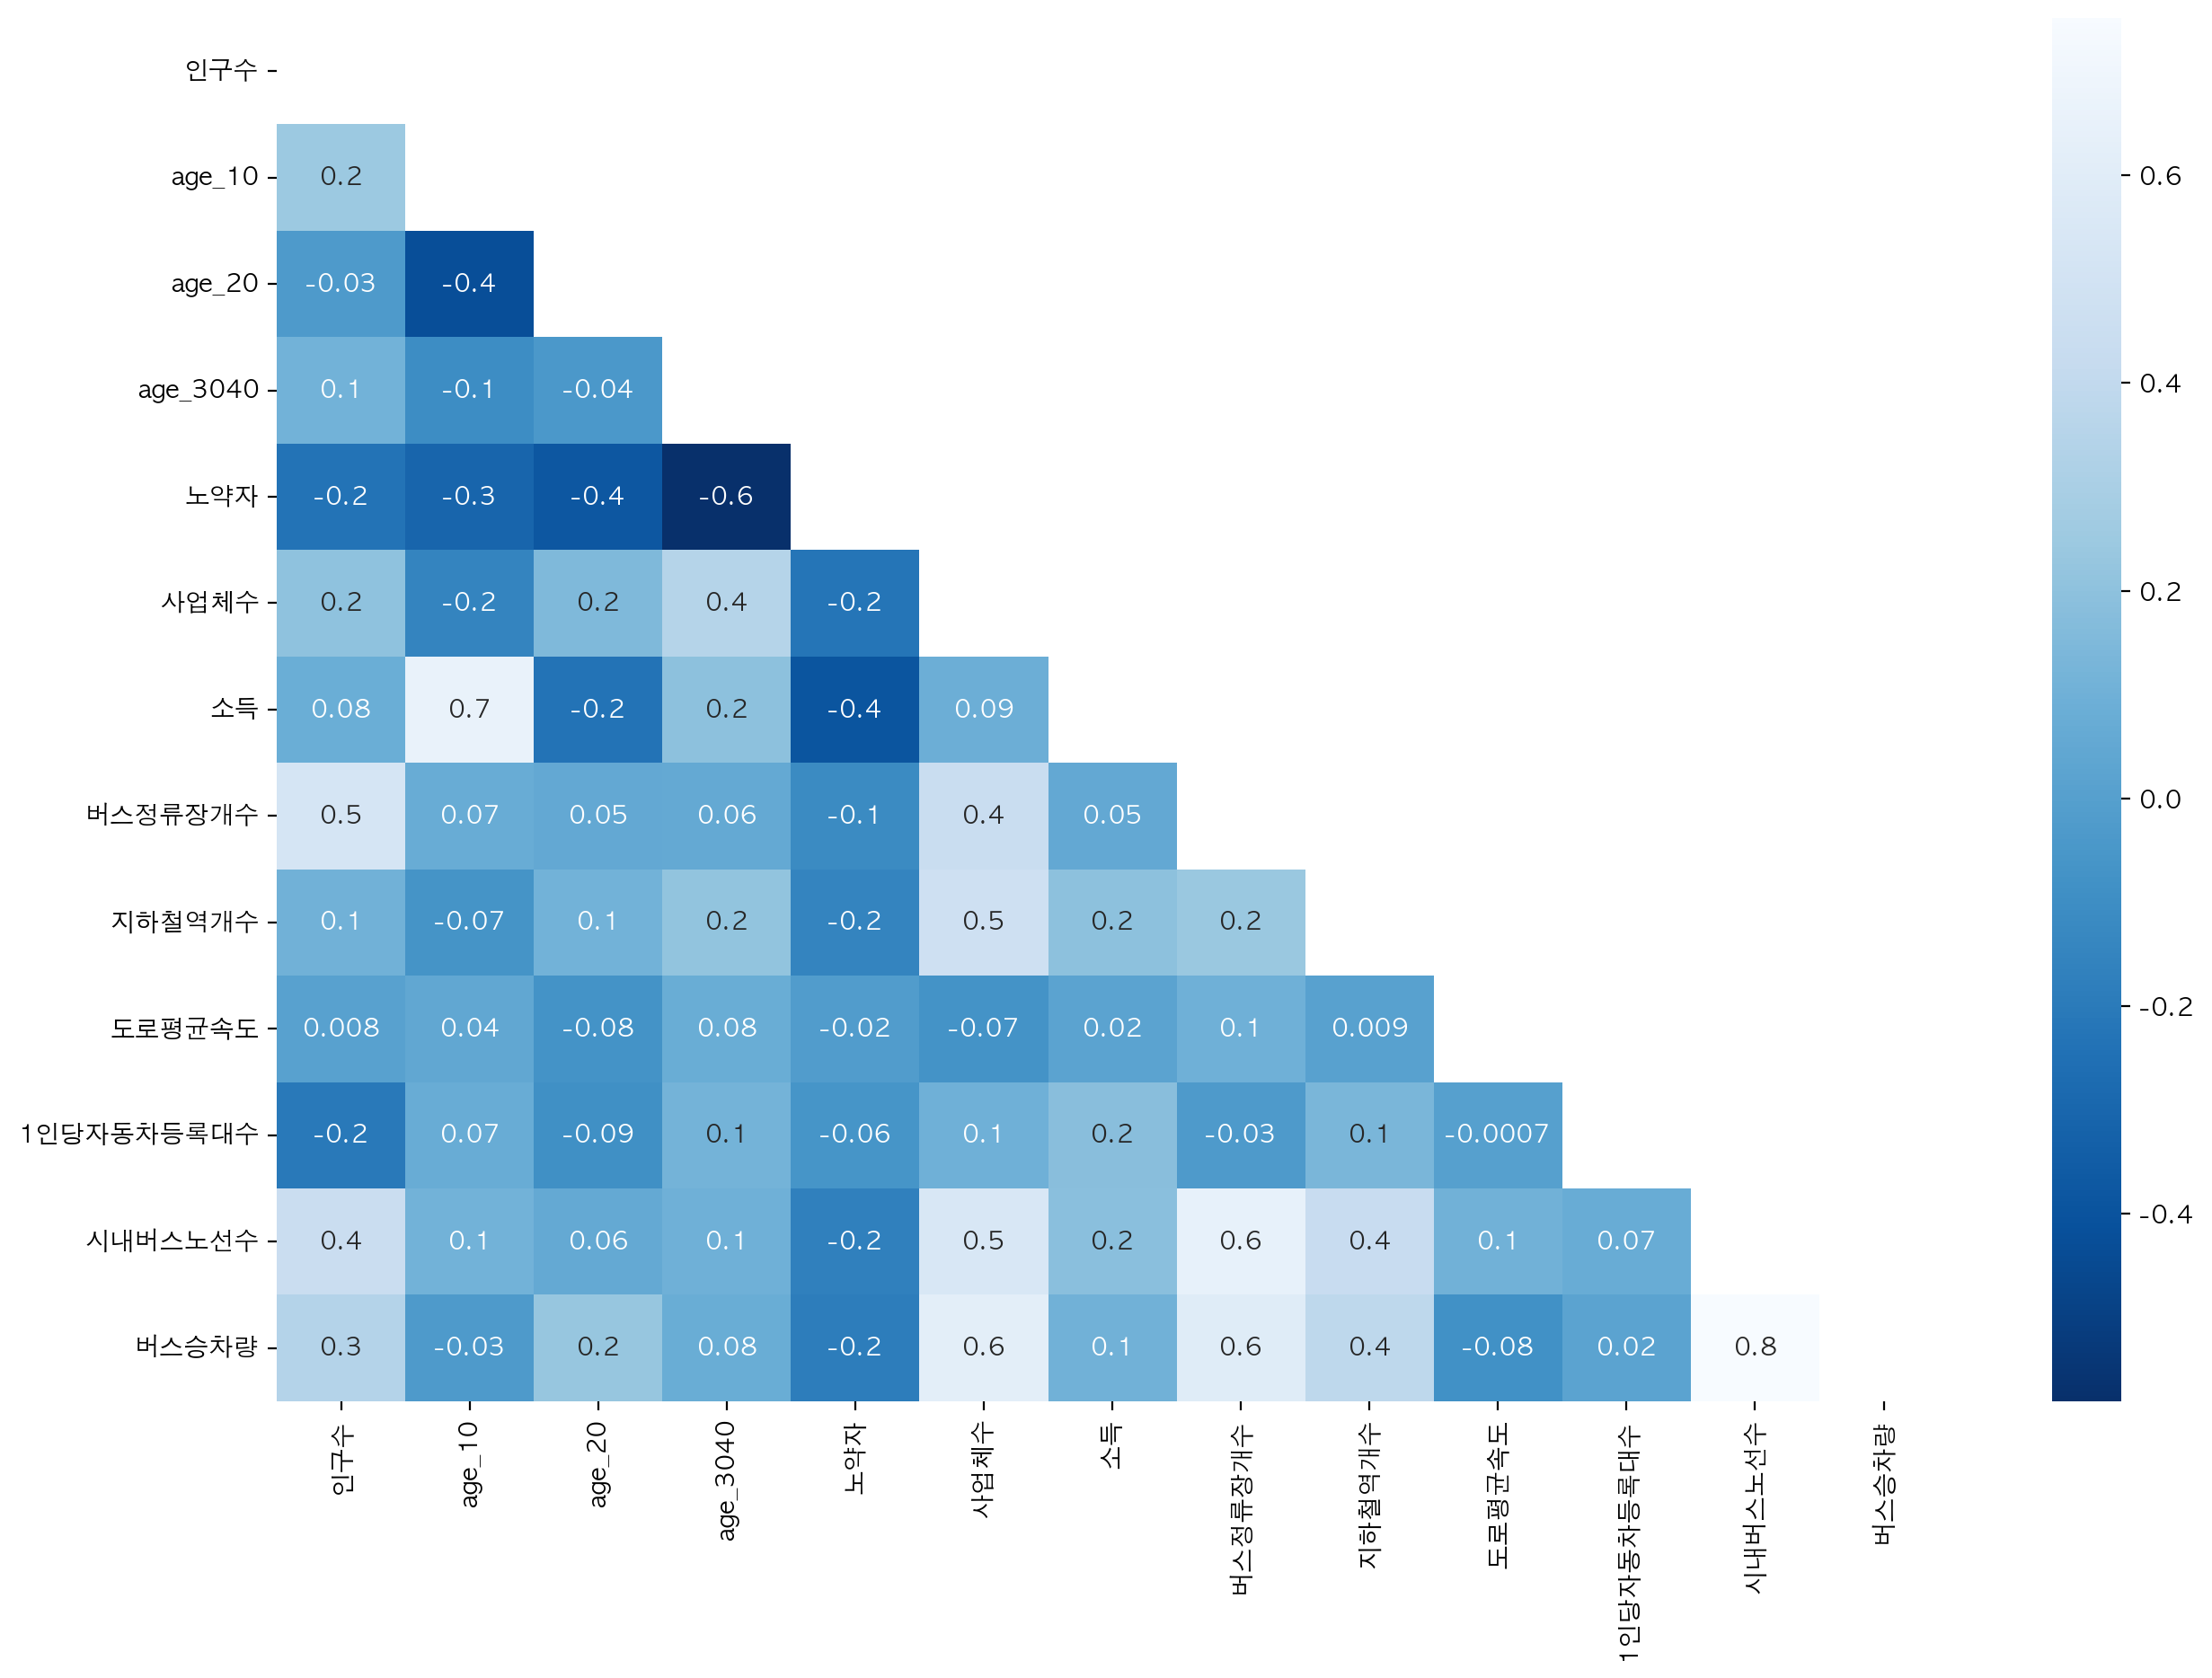

In [57]:
plot_heatmap(df_popul_company)

In [58]:
calculate_aic(df_popul_company, '버스승차량')

13327.187514171272

In [59]:
calculate_vif(df_popul_company, '버스승차량')

,feature,VIF
0,인구수,12.419322
1,age_10,18.077183
2,age_20,7.302463
3,age_3040,49.090156
4,노약자,14.351703
5,사업체수,4.028995
6,소득,31.554259
7,버스정류장개수,8.486968
8,지하철역개수,2.365702
9,도로평균속도,30.811767
